# Canonical Correlation Analysis (CCA)

Canonical Correlation Analysis (CCA) is a statistical method used to identify and measure the associations between two sets of variables. It finds linear combinations of variables for each set (canonical variates) such that the correlation between these variates is maximized.

In this notebook, we will use the **Linnerud dataset** from `scikit-learn` to demonstrate CCA. This dataset consists of three exercise variables (Chins, Situps, Jumps) and three physiological variables (Weight, Waist, Pulse).

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.datasets import load_linnerud

# Set plot style
sns.set(style="whitegrid")

### 2. Load the Dataset
We load the Linnerud dataset. It has two sets of variables:
- **X (Exercise Data):** Chins, Situps, Jumps
- **Y (Physiological Data):** Weight, Waist, Pulse

In [2]:
linnerud = load_linnerud()
X = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
Y = pd.DataFrame(linnerud.target, columns=linnerud.target_names)

print("Exercise Data (X) - First 5 rows:")
print(X.head())
print("\nPhysiological Data (Y) - First 5 rows:")
print(Y.head())

Exercise Data (X) - First 5 rows:
   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0

Physiological Data (Y) - First 5 rows:
   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


### 3. Perform CCA
We will initialize the CCA object with `n_components=2` (since we have 3 variables in each set, we can have at most 3 components, but 2 is usually sufficient for visualization and main interpretation).

In [3]:
# Initialize CCA
cca = CCA(n_components=2)

# Fit the model
cca.fit(X, Y)

# Transform the data to get the canonical variates
X_c, Y_c = cca.transform(X, Y)

print("Shape of Canonical Variates (X_c):", X_c.shape)
print("Shape of Canonical Variates (Y_c):", Y_c.shape)

Shape of Canonical Variates (X_c): (20, 2)
Shape of Canonical Variates (Y_c): (20, 2)


### 4. Calculate Canonical Correlations
The canonical correlations measure the strength of the relationship between the canonical variates. `scikit-learn`'s CCA doesn't directly return the correlations, so we calculate them manually.

In [4]:
cc_res = [np.corrcoef(X_c[:, i], Y_c[:, i])[0, 1] for i in range(X_c.shape[1])]
print("Canonical Correlations:", cc_res)

Canonical Correlations: [0.7956081520064179, 0.20055604168544466]


### 5. Analyze Weights (Loadings)
The weights (or coefficients) tell us how much each original variable contributes to the canonical variates. This is crucial for interpretation.

In [5]:
# X Weights (Exercise)
x_weights = pd.DataFrame(cca.x_weights_, index=X.columns, columns=['CC1', 'CC2'])
print("\nWeights for Exercise Variables (X):")
print(x_weights)

# Y Weights (Physiological)
y_weights = pd.DataFrame(cca.y_weights_, index=Y.columns, columns=['CC1', 'CC2'])
print("\nWeights for Physiological Variables (Y):")
print(y_weights)


Weights for Exercise Variables (X):
             CC1       CC2
Chins   0.264457 -0.228636
Situps  0.797624  0.597929
Jumps  -0.542087  0.768249

Weights for Physiological Variables (Y):
             CC1       CC2
Weight  0.440450 -0.886519
Waist  -0.897149 -0.440528
Pulse   0.033581 -0.141489


### 6. Visualization
Let's visualize the relationship between the first pair of canonical variates.

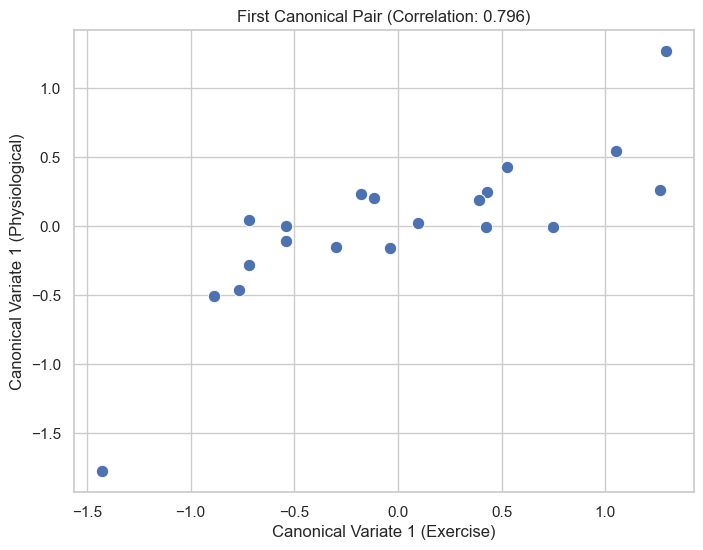

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], s=80, color='b')
plt.xlabel('Canonical Variate 1 (Exercise)')
plt.ylabel('Canonical Variate 1 (Physiological)')
plt.title(f'First Canonical Pair (Correlation: {cc_res[0]:.3f})')
plt.show()

### 7. Interpretation of Results

**1. Canonical Correlations:**
-   The correlation between the first pair of canonical variates (CC1) is **0.80**. This indicates a **strong positive relationship** between the set of exercise variables and the set of physiological variables.
-   The second pair (CC2) has a correlation of **0.20**, which is much weaker and likely less significant.

**2. Interpretation of Weights (First Canonical Variate):**

*   **Exercise Variables (X):**
    -   `Situps` has a strong positive weight (**0.80**).
    -   `Jumps` has a moderate negative weight (**-0.54**).
    -   `Chins` has a weak positive weight (**0.26**).
    -   *Interpretation:* The first canonical variate for exercise is primarily driven by **more situps** and **fewer jumps**.

*   **Physiological Variables (Y):**
    -   `Waist` has a very strong negative weight (**-0.90**).
    -   `Weight` has a moderate positive weight (**0.44**).
    -   `Pulse` has a negligible weight (**0.03**).
    -   *Interpretation:* The first canonical variate for physiology is primarily driven by a **smaller waistline** and somewhat higher weight (likely muscle mass given the context of exercise).

**3. Overall Conclusion:**
There is a strong association where individuals who perform **more situps** (and fewer jumps) tend to have a **smaller waistline**. This aligns with the general understanding that core exercises like situps are associated with waist measurements.